# MNIST를 활용한 AE 실습

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("data/mnist/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
learning_rate = 0.01
epochs = 10
batch_size = 1000
n_hidden = 128
n_input = 28*28

In [6]:
X = tf.placeholder(tf.float32, [None, n_input])

In [7]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [9]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

In [10]:
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [11]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [12]:
def print_fig(pred, y, sample_size):
    fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

    for i in range(sample_size):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[0][i].imshow(np.reshape(pred[i], (28, 28)))
        ax[1][i].imshow(np.reshape(y[i], (28, 28)))

    plt.show()

Epoch:  1 Avg_cost = 0.1370


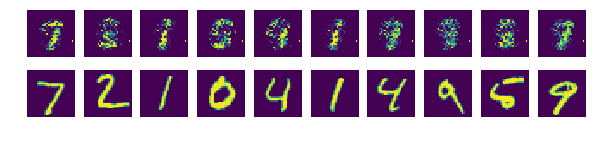

Epoch:  2 Avg_cost = 0.0693


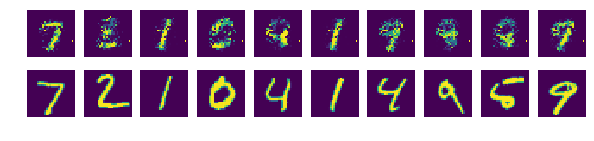

Epoch:  3 Avg_cost = 0.0588


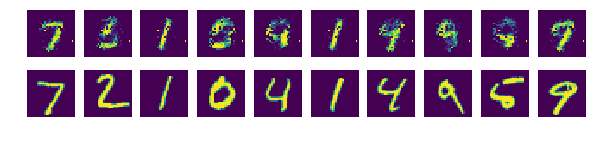

Epoch:  4 Avg_cost = 0.0523


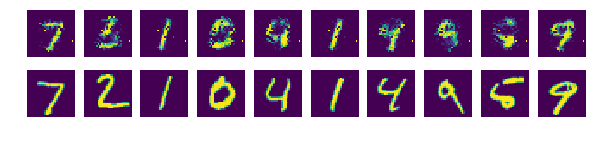

Epoch:  5 Avg_cost = 0.0474


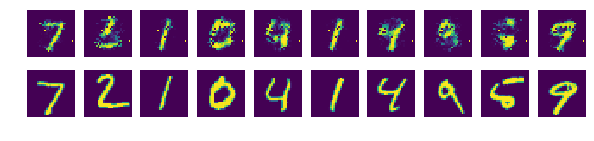

Epoch:  6 Avg_cost = 0.0433


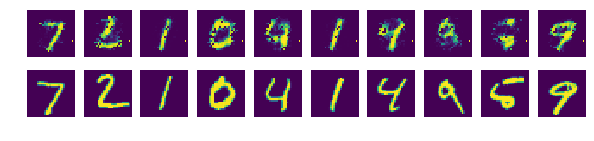

Epoch:  7 Avg_cost = 0.0403


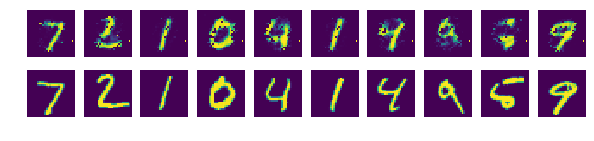

Epoch:  8 Avg_cost = 0.0383


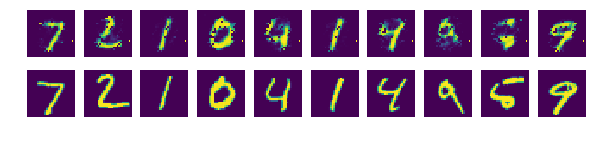

Epoch:  9 Avg_cost = 0.0369


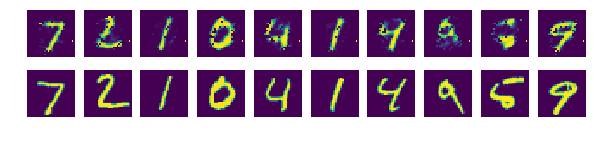

Epoch: 10 Avg_cost = 0.0359


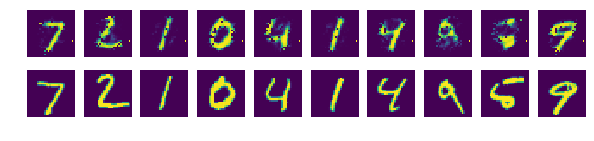

Learning Complete..!


In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_batch = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        avg_cost += cost_batch/total_batch
        
    print('Epoch:', '%2d' % (epoch + 1),
          'Avg_cost =', '{:.4f}'.format(avg_cost))
    
    sample_size = 10
    samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})
    print_fig(samples, mnist.test.images, sample_size)

print('Learning Complete..!')

